In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
import os
from src import data
import json

In [70]:
############################################
sweep_root = "../../results/faithfulness_baselines"
model_name = "gptj"
############################################

results_file = f"{sweep_root}/{model_name}.json"

with open(results_file, "r") as f:
    results_raw = json.load(f)

In [82]:
results_formatted = {}
for relation_results in results_raw:
    result = {k: v for k, v in relation_results.items() if k != "trials"}
    result["recall"] = {}
    for trial_result in relation_results["trials"]:
        prompting_approaches = ["zero_shot", "icl"]
        for approach in prompting_approaches:
            if approach not in result["recall"]:
                result["recall"][approach] = {}
            for method_key in trial_result[approach]:
                if method_key not in result["recall"][approach]:
                    result["recall"][approach][method_key] = []
                result["recall"][approach][method_key].append(trial_result[approach][method_key]["recall"])
    
    for approach in prompting_approaches:
        for method_key in result["recall"][approach]:
            result["recall"][approach][method_key] = np.array(result["recall"][approach][method_key]).mean(axis = 0)
    
    results_formatted[relation_results["relation_name"]] = result

In [83]:
results_formatted

{'country language': {'relation_name': 'country language',
  'h_layer': 0,
  'beta': 0.31666667262713116,
  'known_samples': 21,
  'total_samples': 24,
  'prompt_template': 'People in {} speak',
  'recall': {'zero_shot': {'logit_lens': array([0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.04166667, 0.04166667, 0.04166667]),
    'corner': array([0.04166667, 0.29166667, 0.39583333, 0.39583333, 0.5625    ,
           0.66666667, 0.6875    , 0.6875    , 0.6875    , 0.75      ]),
    'learned_linear': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'lre_emb': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'lre': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
   'icl': {'logit_lens': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
    'corner': array([0.04166667, 0.22916667, 0.41666667, 0.45833333, 0.52083333,
           0.60416667, 0.64583333, 0.6875    , 0.72916667, 0.75      ]),
    'learned_linear': array([0.08333333, 0.291

In [81]:
results_formatted['country language']

{'relation_name': 'country language',
 'h_layer': 0,
 'beta': 0.31666667262713116,
 'known_samples': 21,
 'total_samples': 24,
 'prompt_template': 'People in {} speak',
 'recall': {'zero_shot': {'logit_lens': [[0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0,
     0.0625,
     0.0625,
     0.0625],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.0625, 0.0625]],
   'corner': [[0.0625,
     0.25,
     0.375,
     0.375,
     0.5625,
     0.6875,
     0.6875,
     0.6875,
     0.6875,
     0.75],
    [0.0625, 0.3125, 0.375, 0.375, 0.5625, 0.625, 0.625, 0.625, 0.625, 0.75],
    [0.0, 0.3125, 0.4375, 0.4375, 0.5625, 0.6875, 0.75, 0.75, 0.75, 0.75]],
   'learned_linear': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
   'lre_emb': [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0,

In [84]:
dataset = data.load_dataset()
relations_by_name = {r.name: r for r in dataset.relations}

In [87]:
from typing import Literal
property_key: Literal["relation_type", "fn_type", "disambiguating", "symmetric"] = "relation_type"


performance_category_wise = {}
for relation_name in results_formatted:
    property_value = relations_by_name[relation_name].properties.__dict__[property_key]
    result = results_formatted[relation_name]
    if property_value not in performance_category_wise:
        performance_category_wise[property_value] = {}
    for prompting in result["recall"]:
        if prompting not in performance_category_wise[property_value]:
            performance_category_wise[property_value][prompting] = {}

        for method in result["recall"][prompting]:
            if method not in performance_category_wise[property_value][prompting]:
                performance_category_wise[property_value][prompting][method] = []
            performance_category_wise[property_value][prompting][method].append(result["recall"][prompting][method])
    

for property_value in performance_category_wise:
    for prompting in performance_category_wise[property_value]:
        for method in performance_category_wise[property_value][prompting]:
            performance_category_wise[property_value][prompting][method] = np.array(performance_category_wise[property_value][prompting][method]).mean(axis = 0)

In [88]:
performance_category_wise

{'factual': {'zero_shot': {'logit_lens': array([0.01194448, 0.01614868, 0.01975229, 0.0308783 , 0.0326801 ,
          0.04132088, 0.04590046, 0.05048004, 0.05439824, 0.05725825]),
   'corner': array([0.22100385, 0.32430232, 0.39403655, 0.46666675, 0.51884987,
          0.56600118, 0.5971297 , 0.62179664, 0.63966285, 0.65973924]),
   'learned_linear': array([0.        , 0.        , 0.00111111, 0.00169591, 0.00169591,
          0.00169591, 0.00403509, 0.00403509, 0.0051462 , 0.0076462 ]),
   'lre_emb': array([0.0005848 , 0.00175439, 0.00730182, 0.0112517 , 0.01726047,
          0.02213377, 0.02213377, 0.03139303, 0.0326276 , 0.0332282 ]),
   'lre': array([0.00138889, 0.00397898, 0.00675676, 0.01288382, 0.01490402,
          0.01740402, 0.02433754, 0.02850421, 0.03394954, 0.03593903])},
  'icl': {'logit_lens': array([0.04687942, 0.05228482, 0.0627    , 0.07204625, 0.07841977,
          0.08325412, 0.0870138 , 0.09204623, 0.09924316, 0.10337109]),
   'corner': array([0.23822225, 0.32783466

In [127]:
#####################################################################################
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 24
MEDIUM_SIZE = 26
BIGGER_SIZE = 30

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
#####################################################################################


def plot_categorywise(canvas, result, title):
    bar_width = 0.225
    prompting_colors = {"zero_shot": "deepskyblue", "icl": "darkblue"}
    method_name_dict  = {
        "logit_lens": "Logit Lens",
        "corner": "Offshoot",
        "learned_linear": "Linear Regression",
        "lre_emb": "LRE (emb)",
        "lre": "LRE"
    }
    idx = 0
    for prompting in result:
        recalls = [result[prompting][method][0] for method in result[prompting]]
        canvas.bar(
            np.arange(len(recalls)) + idx * bar_width, recalls, 
            width = bar_width, label = prompting.capitalize(), 
            color = prompting_colors[prompting],
            edgecolor = "black",
            alpha = 0.8
        )
        idx += 1
    
    canvas.set_ylim(0, 1)
    canvas.set_title(title.capitalize())
    canvas.set_xticks(np.arange(len(result[prompting])) + 0.5 * bar_width)
    canvas.set_xticklabels([method_name_dict[method] for method in result[prompting]], rotation = 90)
        

/tmp/ipykernel_287337/1998319180.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


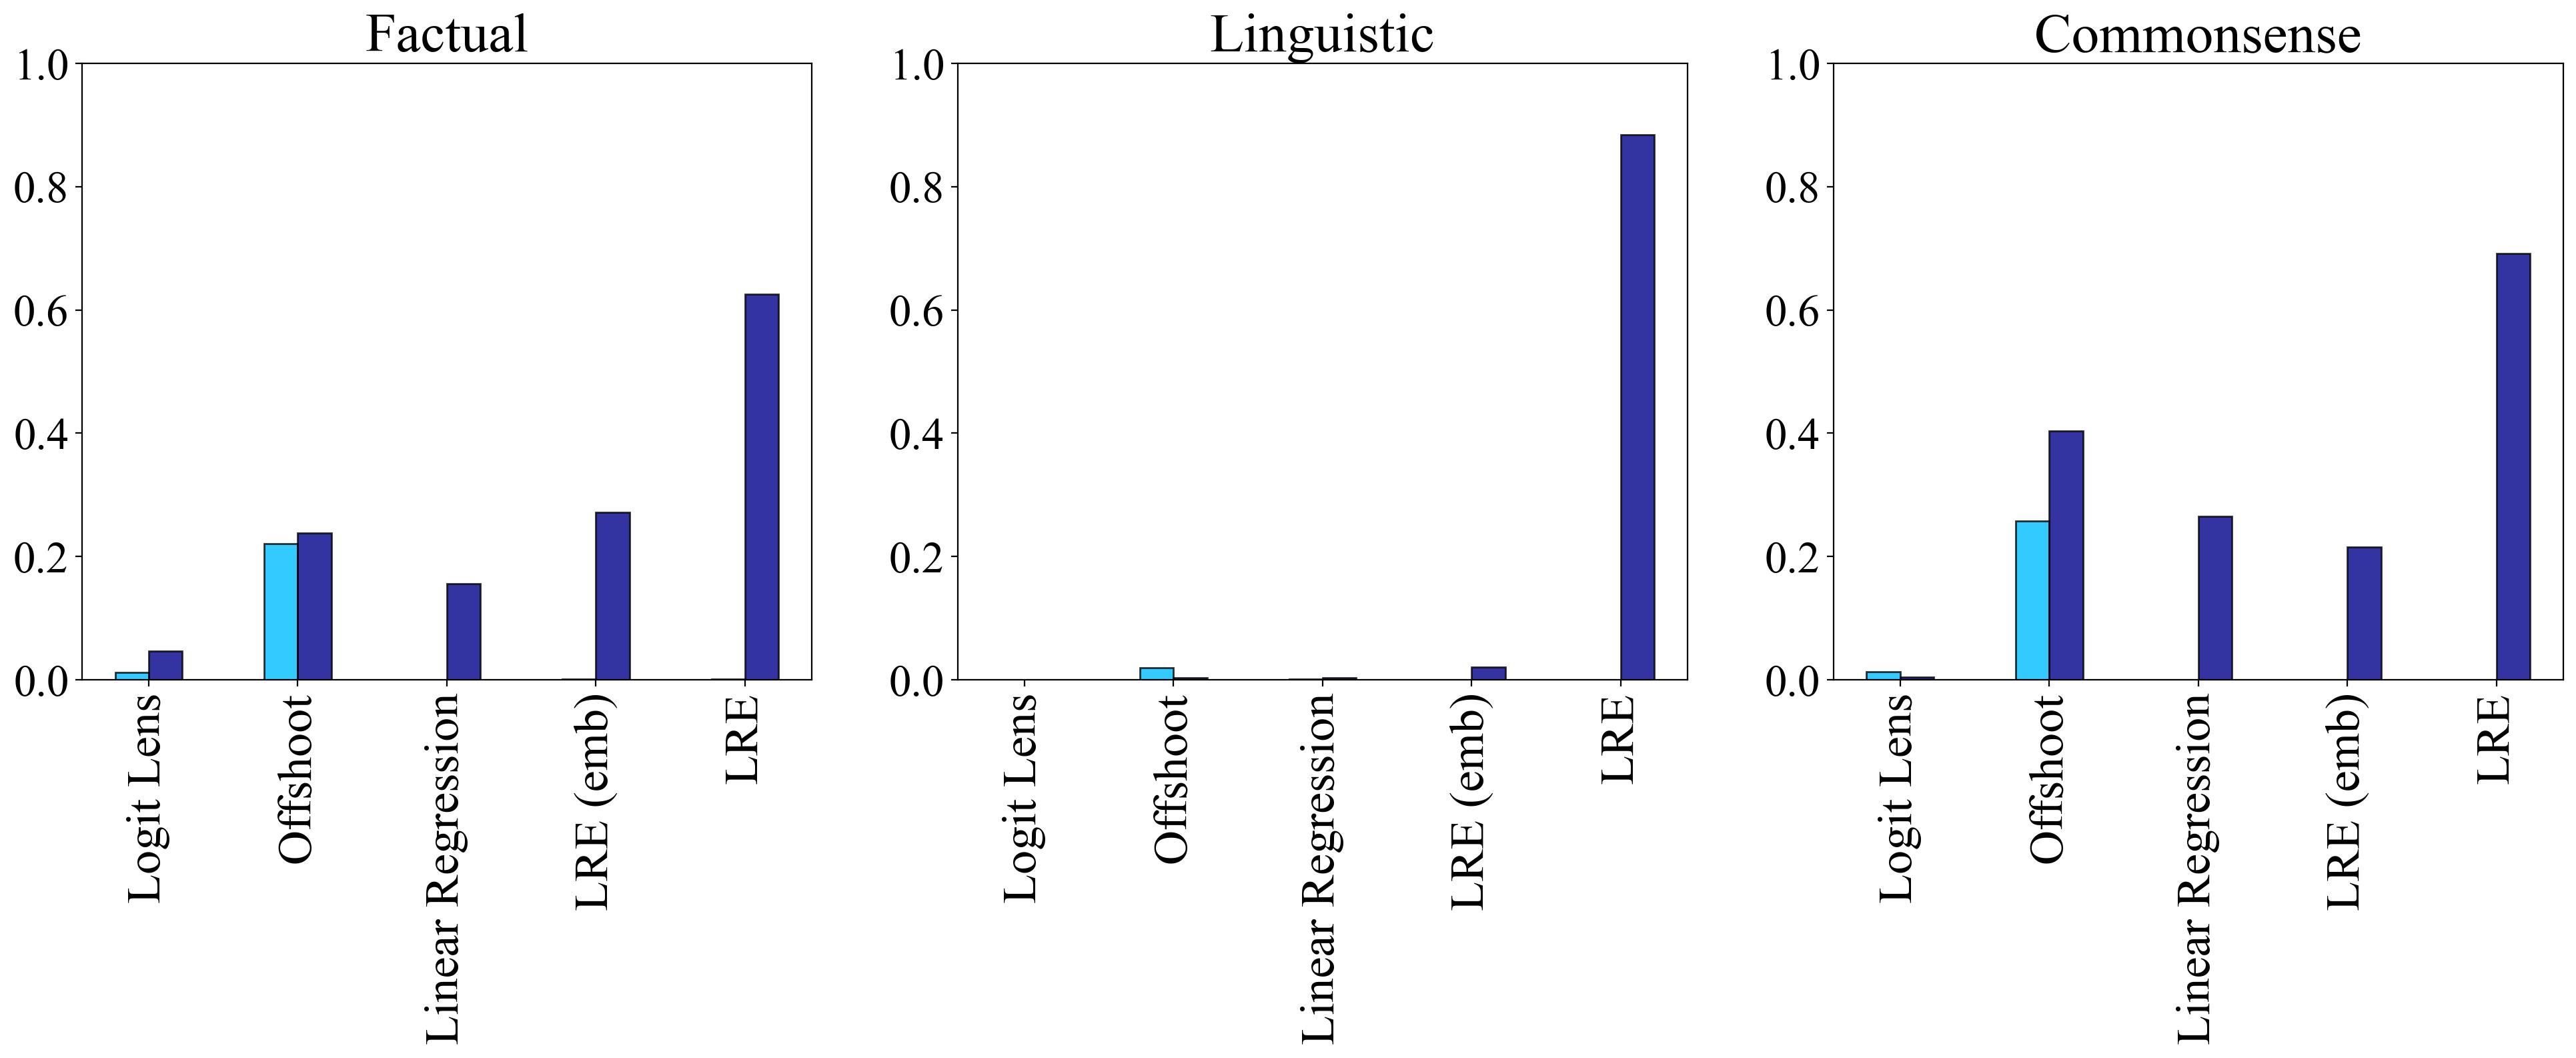

In [128]:
n_subplots = len(performance_category_wise)
ncols=n_subplots
nrows=1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 6))
if nrows == 1:
    axes = [axes]
if ncols == 1:
    axes = [[ax] for ax in axes]

ax_col, ax_row = 0, 0
for i, (category, result) in enumerate(performance_category_wise.items()):
    plot_categorywise(canvas = axes[ax_row][ax_col], result = result, title = category)
    ax_col += 1
    if ax_col == ncols:
        ax_col = 0
        ax_row += 1
    # break
fig.show()

In [54]:
#####################################################################################
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 15
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
#####################################################################################

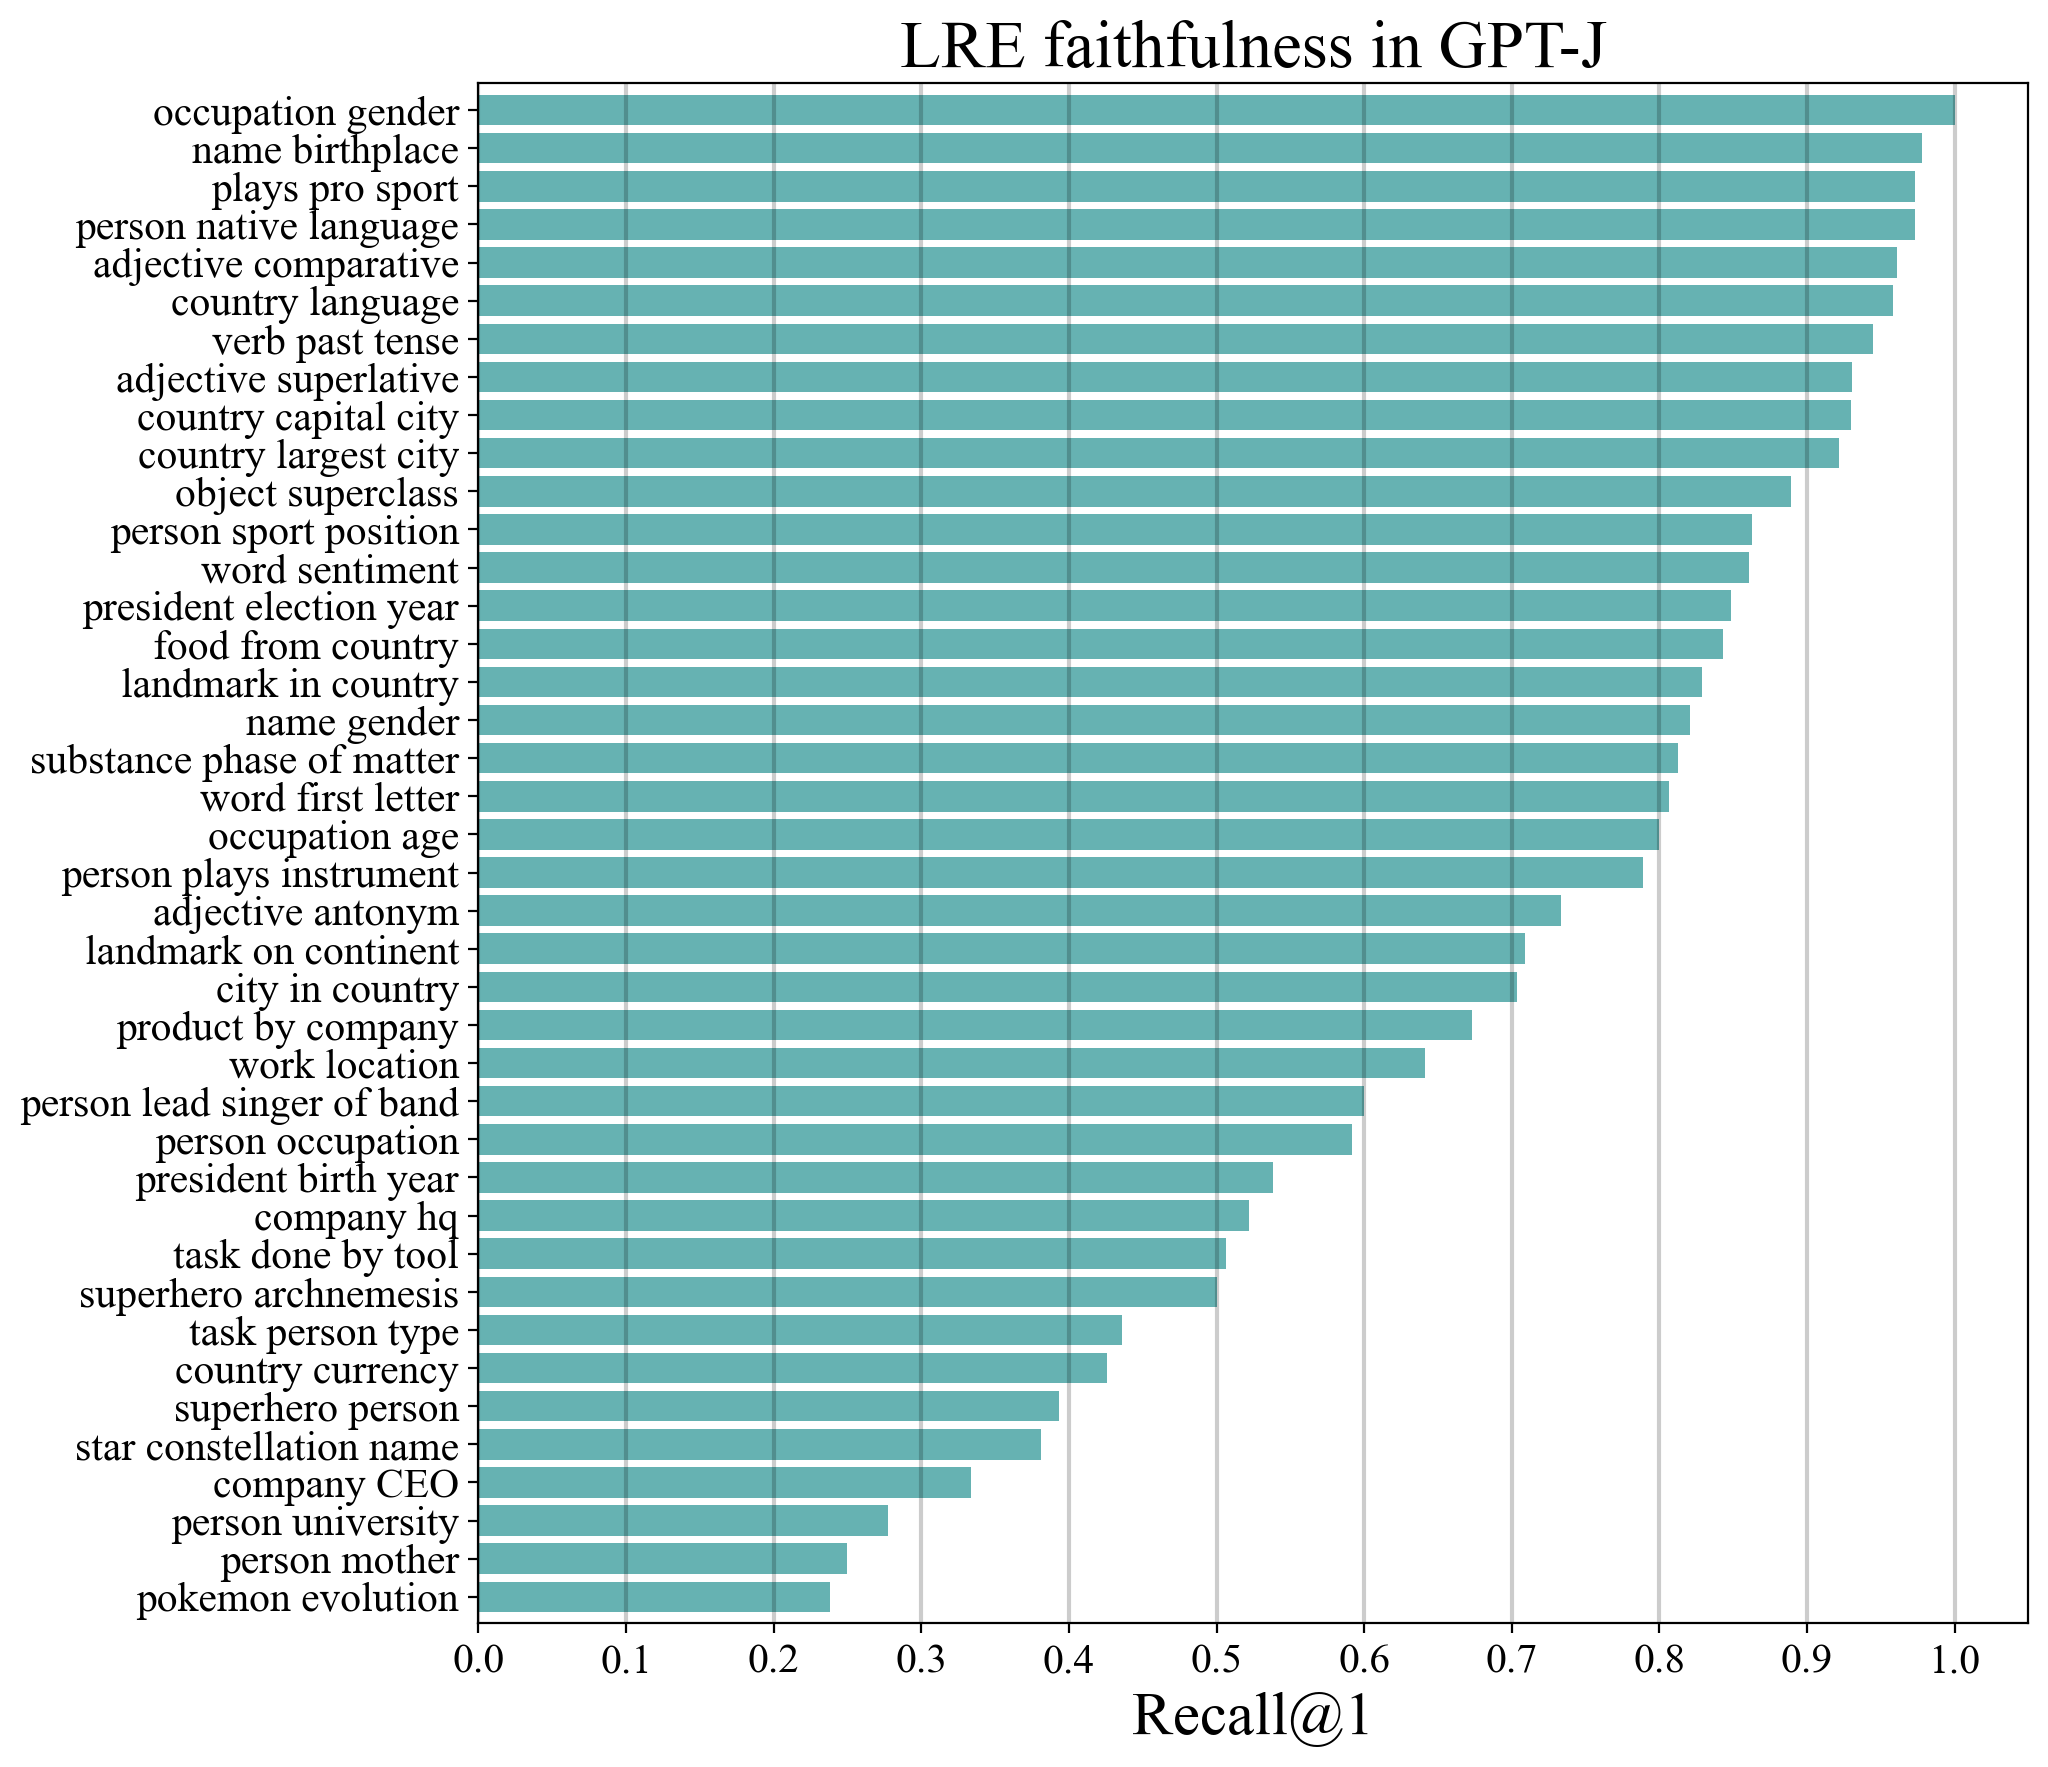

In [65]:
relation_and_recall = []

for relation_name in results_formatted:
    relation_and_recall.append({
        "relation": relation_name,
        "recall@1": results_formatted[relation_name]["recall"]['icl_mean'][0]
    })

relation_and_recall = sorted(relation_and_recall, key = lambda x: x["recall@1"])

relations = [r["relation"] for r in relation_and_recall]
recalls = [r["recall@1"] for r in relation_and_recall]

plt.figure(figsize = (10, 10))
plt.barh(np.arange(len(relations)), recalls, color = "teal", alpha = 0.6)
plt.yticks(np.arange(len(relations)), relations)
plt.xticks(np.linspace(0, 1, 11), [np.round(v, 1) for v in np.linspace(0, 1, 11)])
plt.ylim(-0.7,len(relation_and_recall)-.3)
plt.xlabel("Recall@1")

for x_tick in np.linspace(0, 1, 11):
    plt.axvline(x_tick, color = "black", alpha = 0.2)

plt.title("LRE faithfulness in GPT-J")

plt.show()

In [43]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])